<a href="https://colab.research.google.com/github/Jonesy639/Food_Delivery_Service_Market_Analysis/blob/main/Food_Delivery_Service_Market_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Food Delivery Service Industry**

Factor Analysis and Market Segmentation

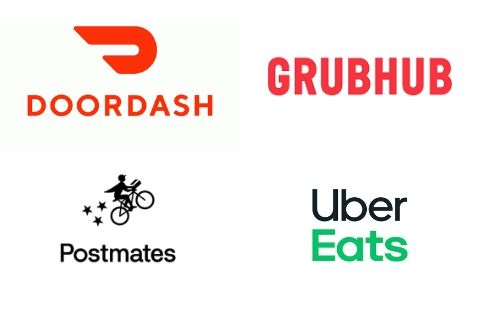

This notebook contains an analysis of the food delivery service market and how Covid-19 affected the preferences and usage habits of consumers. 

The notebook references primary data collected from a survey sent out to graduate students from the University of Maryland. Our market survey focuses on four delivery platforms (Uber Eats, DoorDash, Postmates, and GrubHub) with the major aim of exploring the customers' perception of the attributes from different platforms in our community. This data examines the preference factors of various food delivery services including cost, delivery time, variety of food choices, discount and promotion, customer service, and app features. Through understanding these key purchase drivers, we draw constructive insights by applying four different analysis techniques: **Principal Component Analysis, Exploratory Factor Analysis, Multidimensional Scaling, Clustering including K-mean clustering and Hierarchical clustering**. 



**Project Data Cleaning**

16 20
   Q32_14 Service/Delivery charge  ...  Q32_19 App features
0                             3.0  ...                  5.0
1                             2.0  ...                  3.0
2                             4.0  ...                  4.0
3                             2.0  ...                  4.0
4                             2.0  ...                  3.0

[5 rows x 6 columns]


,Q2_UberEats,Q2_DoorDash,Q2_GrubHub,Q2_Postmates,Q3,Q4,Q32_14 Service/Delivery charge,Q32_15 Delivery time,Q32_16 Variety of food choices,Q32_17 Discount and promotion,Q32_18 Customer service,Q32_19 App features,Q6,Q31_22 Cost of fees,Q31_23 Delivery time,Q31_24 Variety of food choices,Q31_25 Discount and promotion,Q31_26 Customer service,Q31_27 App features,Q8_TOP1,Q8_TOP2,Q8_TOP3,Q9,Q10_Service/delivery charge,Q10_Delivery time,Q10_variety of food choices,Q10_Discount and promotion,Q10_customer service,Q10_App features,Q10_Other,Q11,Q12,Q13,Q14,Q15,Q16,Q17_1,Q18_1 Driver behavior,Q18_2 Follow drop off Instructions,Q18_3 Driver communication,Q18_4 Refund Process,Q18_5 Customer service representative,Q19_1 Order tracking,Q19_2 Driver tracking,Q19_3 Easy to use,Q20,Q21
0,1,1,1,1,4,UberEats,3.0,4.0,4.0,1.0,3.0,5.0,GrubHub,3.0,4.0,4.0,3.0,3.0,4.0,Service/delivery charge,Discount and promotion,Delivery time,"customer service (Appearance of drivers, refund)",1,0,0,1,0,0,0,$5 or less,20 - 40 minutes,NaN,NaN,"No, I have never considered it.","Yes, I have.",Most of the time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23-27,Female


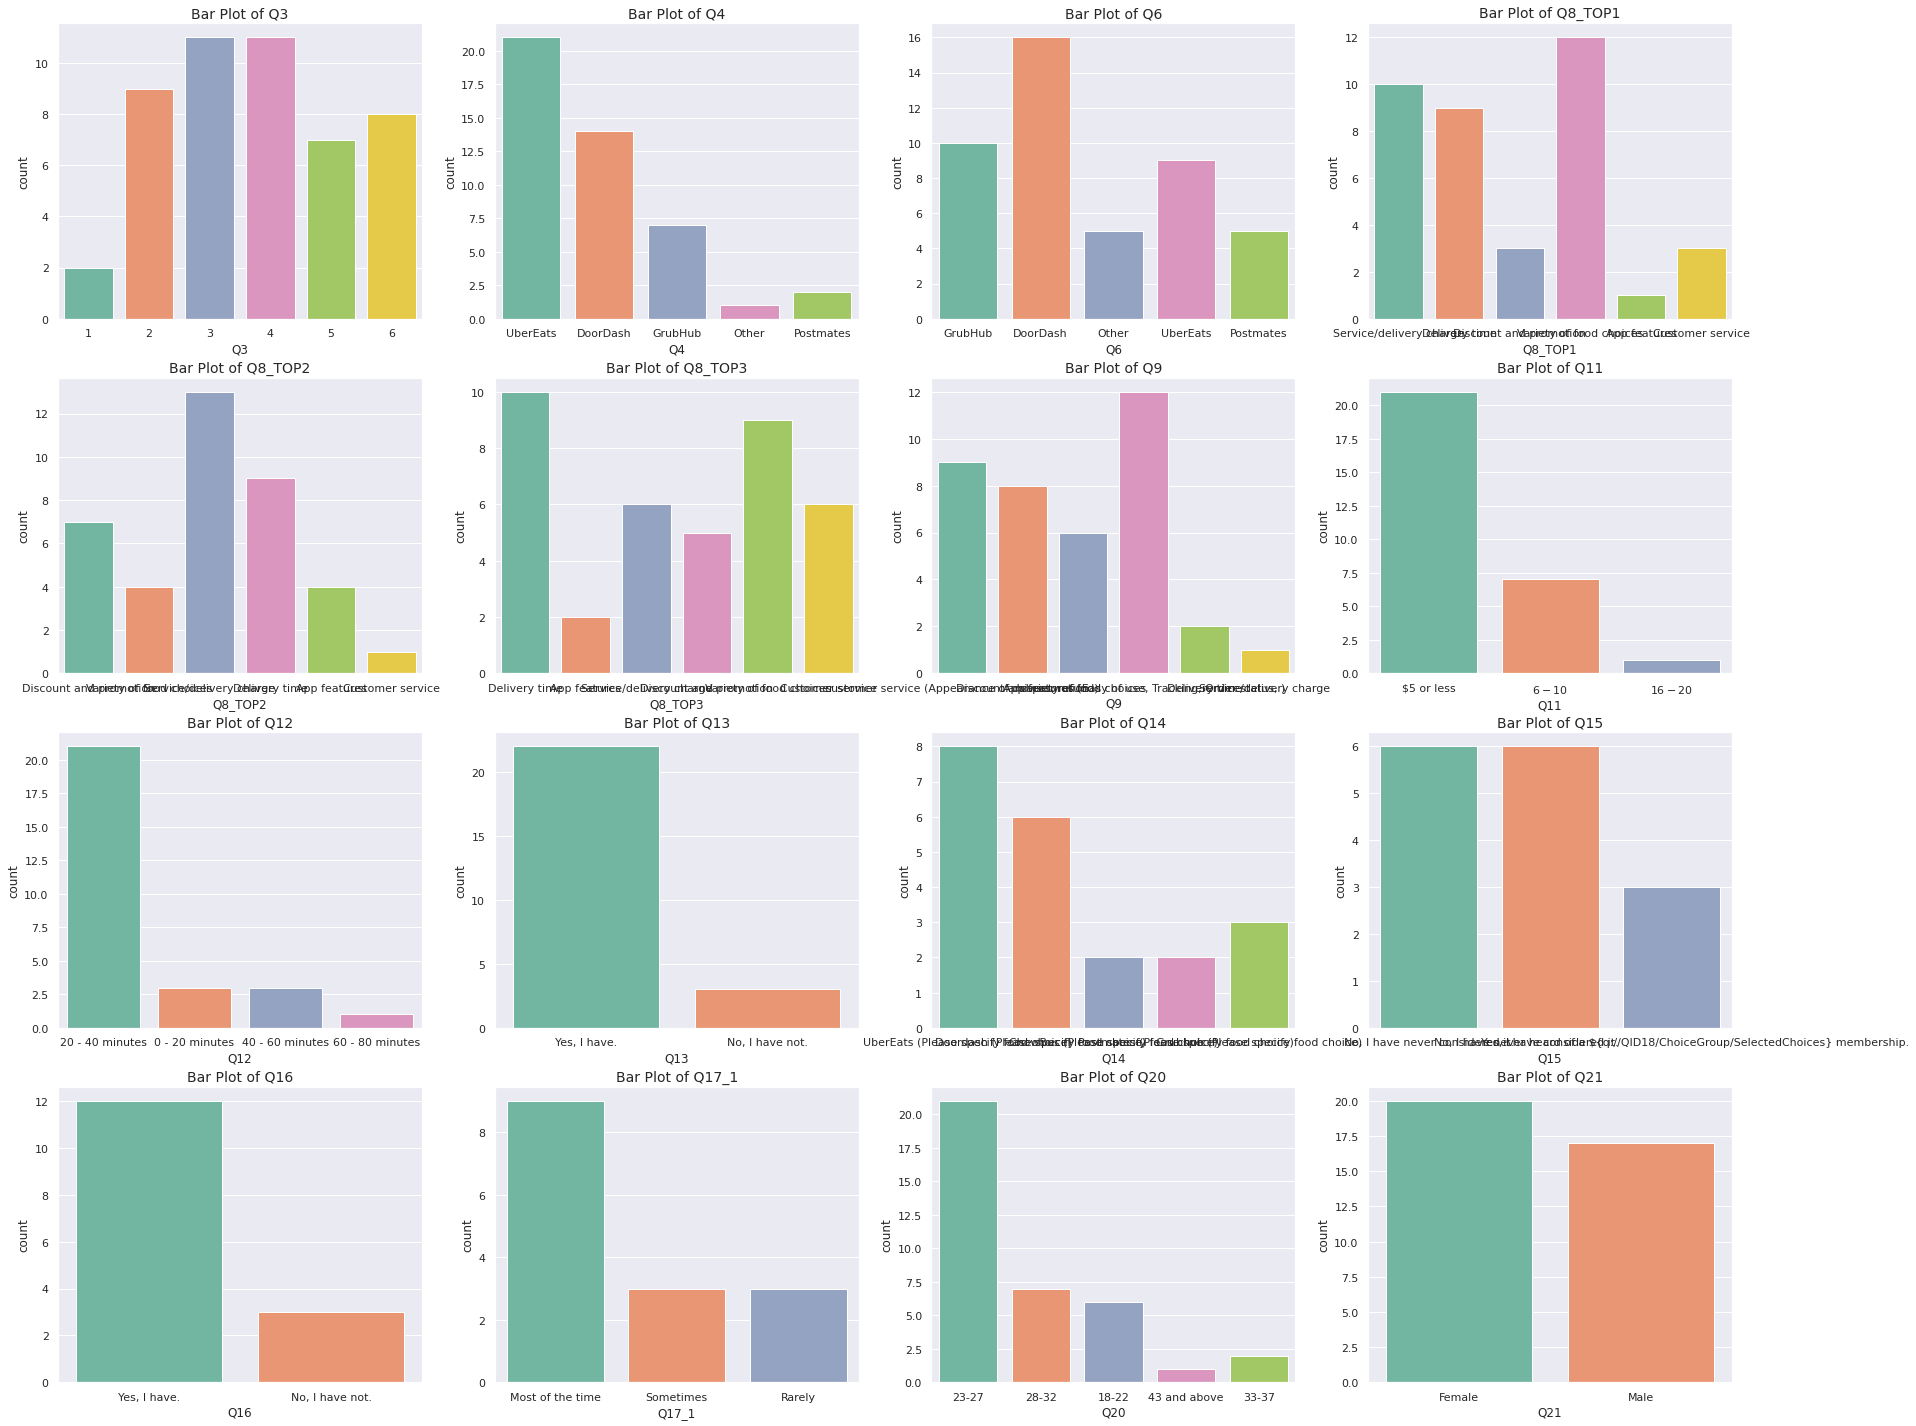

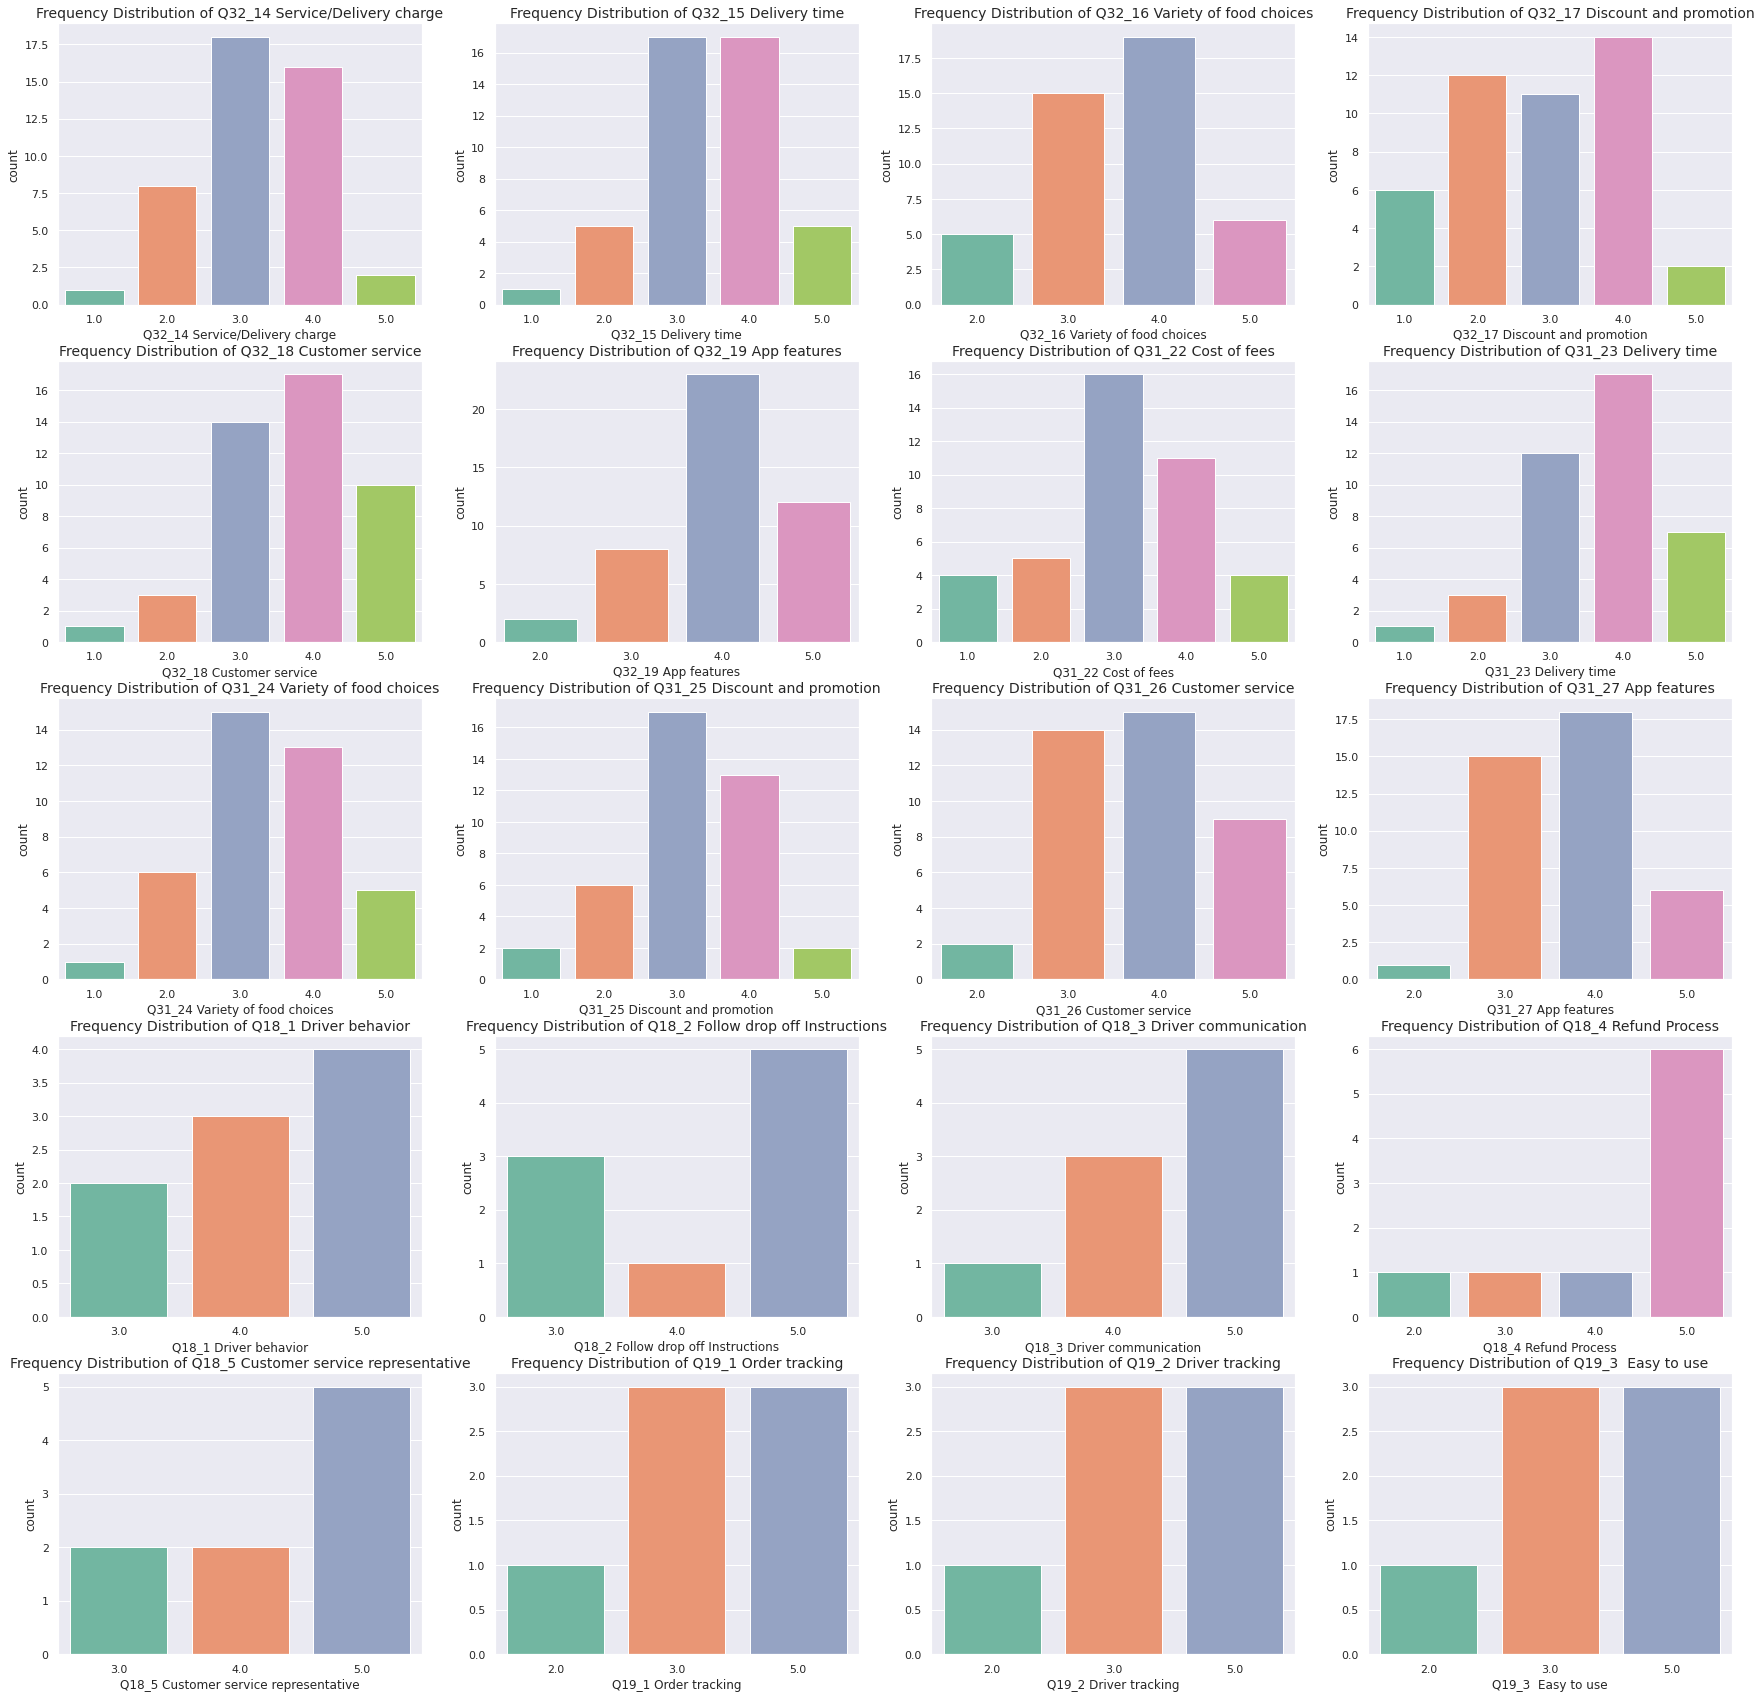

In [ ]:
import numpy as np
import pandas as pd
df=pd.read_csv("/content/Survey - Team 1_April 15, 2021_10.36.csv",header=[0],skiprows=[1,2])
df.head(1)
# q2 Have you ever used any of the following food delivery services? Select all that apply. 

def clean_multi_choice(data,question_num,ans_list_all):
    data=data.copy()
    for ans in ans_list_all:
        data["CLEAN-{}_{}".format(question_num,ans)]=data[question_num].map(lambda x:1 if ans in str(x) else 0)
        
    return data
        
        
q2_answers_list=["UberEats","DoorDash","GrubHub","Postmates"]
data=clean_multi_choice(df,question_num="Q2",ans_list_all=q2_answers_list)

data
# q3 How often do you use a food delivery service? (such as UberEats, GrubHub, etc...)

q3_answers_dict={'2-3 times a month':4, 
                 'Once a week':3, 
                 'Once a month':5, 
                 'Daily': 1,
                 '2-3 times a week':2, 
                 np.nan:6, 
                 "I can't recall":6}

# 保留原始的类别取值
data["CLEAN-Q3"]=data["Q3"].map(q3_answers_dict)

data
# q4 Which food delivery company do you use most often?

#['UberEats' 'DoorDash' 'GrubHub' nan 'Other' 'Postmates']

data["CLEAN-Q4"]=data["Q4"]
# How satisfied are you with UberEats in regards to each attribute?

q32_answers_dict={'Very Dissatisfied':1,'Dissatisfied':2,'Neutral':3,'Satisfied':4,'Very Satisfied':5}

data["CLEAN-Q32_14 Service/Delivery charge"]=data["Q32_14"].map(q32_answers_dict)
data["CLEAN-Q32_15 Delivery time"]=data["Q32_15"].map(q32_answers_dict)
data["CLEAN-Q32_16 Variety of food choices"]=data["Q32_16"].map(q32_answers_dict)
data["CLEAN-Q32_17 Discount and promotion"]=data["Q32_17"].map(q32_answers_dict)
data["CLEAN-Q32_18 Customer service"]=data["Q32_18"].map(q32_answers_dict)
data["CLEAN-Q32_19 App features"]=data["Q32_19"].map(q32_answers_dict)

data
# What would you likely use as an alternative if UberEats is no longer available? 

# ['GrubHub' 'DoorDash' 'Other' 'UberEats' nan 'Postmates']
data["CLEAN-Q6"]=data["Q6"]
# How satisfied are you with GrubHub in regards to each attribute?

q31_answers_dict={'Very Dissatisfied':1,'Dissatisfied':2,'Neutral':3,'Satisfied':4,'Very Satisfied':5}

data["CLEAN-Q31_22 Cost of fees"]=data["Q31_22"].map(q31_answers_dict)
data["CLEAN-Q31_23 Delivery time"]=data["Q31_23"].map(q31_answers_dict)
data["CLEAN-Q31_24 Variety of food choices"]=data["Q31_24"].map(q31_answers_dict)
data["CLEAN-Q31_25 Discount and promotion"]=data["Q31_25"].map(q31_answers_dict)
data["CLEAN-Q31_26 Customer service"]=data["Q31_26"].map(q31_answers_dict)
data["CLEAN-Q31_27 App features"]=data["Q31_27"].map(q31_answers_dict)
# Please rank your top 3 attributes that are most important to you when choosing a food delivery service. 
#(1 as the most important, 2 as the second important, etc.)

# top 1 2 3
data["Q8_32"]=data["Q8_32"].map(lambda x: int(x) if pd.isnull(x)==False else 0)
data["Q8_33"]=data["Q8_33"].map(lambda x: int(x) if pd.isnull(x)==False else 0)
data["Q8_34"]=data["Q8_34"].map(lambda x: int(x) if pd.isnull(x)==False else 0)
data["Q8_35"]=data["Q8_35"].map(lambda x: int(x) if pd.isnull(x)==False else 0)
data["Q8_36"]=data["Q8_36"].map(lambda x: int(x) if pd.isnull(x)==False else 0)
data["Q8_37"]=data["Q8_37"].map(lambda x: int(x) if pd.isnull(x)==False else 0)

def get_topn(row,n=1):
    if row["Q8_32"]==n:
        return "Service/delivery charge"
    
    elif row["Q8_33"]==n:
        return "Delivery time"
    
    elif row["Q8_34"]==n:
        return "Variety of food choices"
    
    elif row["Q8_35"]==n:
        return "Discount and promotion"
    
    elif row["Q8_36"]==n:
        return "Customer service"
    
    elif row["Q8_37"]==n:
        return "App features"
    
data["CLEAN-Q8_TOP1"]=data.apply(lambda row: get_topn(row,n=1),axis=1)
data["CLEAN-Q8_TOP2"]=data.apply(lambda row: get_topn(row,n=2),axis=1)
data["CLEAN-Q8_TOP3"]=data.apply(lambda row: get_topn(row,n=3),axis=1)

data
# What is the attribute you consider the least when choosing a food delivery service?

# 单选 ['customer service (Appearance of drivers, refund)'
#  'Discount and promotion' 'variety of food choices'
#  'App features (Easy of use, Tracking, Order status, )' nan
#  'Delivery time' 'Service/delivery charge']
data["CLEAN-Q9"]=data["Q9"]
# What attribute would you like UberEats to improve on? (Select all that applies)

# 多选
q10_answers_list=['Service/delivery charge',
                  'Delivery time',
                  'variety of food choices', 
                  'Discount and promotion',
                  'customer service',
                  'App features',
                  'Other']
data=clean_multi_choice(data,question_num="Q10",ans_list_all=q10_answers_list)
data
# How long are you willing to wait for your ordered food to arrive?

# ['20 - 40 minutes' '0 - 20 minutes' nan '40 - 60 minutes' '60 - 80 minutes']
data["CLEAN-Q11"]=data["Q11"]
# What is the most you are willing to pay for delivery fee and service fee combined?

# 单选 
# ['$5 or less' nan '$6 - $10' '$16 - $20']
data["CLEAN-Q12"]=data["Q12"]
# How you ever switched food delivery services to get more options in food choices?
# ['Yes, I have.' nan 'No, I have not.']

data["CLEAN-Q13"]=data["Q13"]
# did not clean Q14

data["CLEAN-Q14"]=data["Q14"]
data["CLEAN-Q15"]=data["Q15"]
data["CLEAN-Q16"]=data["Q16"]
data["CLEAN-Q17_1"]=data["Q17_1"]
# How important are the following to you?
q18_answers_dict={'Very Important':5,'Moderately Important':4,'Important':3,"Slightly Important":2,"Unimportant":1}

data["CLEAN-Q18_1 Driver behavior"]=data["Q18_1"].map(q18_answers_dict)
data["CLEAN-Q18_2 Follow drop off Instructions"]=data["Q18_2"].map(q18_answers_dict)
data["CLEAN-Q18_3 Driver communication"]=data["Q18_3"].map(q18_answers_dict)
data["CLEAN-Q18_4 Refund Process"]=data["Q18_4"].map(q18_answers_dict)
data["CLEAN-Q18_5 Customer service representative"]=data["Q18_5"].map(q18_answers_dict)
# How important are the following to you?
q19_answers_dict={'Very Important':5,'Moderately Important':4,'Important':3,"Slightly Important":2,"Unimportant":1}

data["CLEAN-Q19_1 Order tracking"]=data["Q19_1"].map(q19_answers_dict)
data["CLEAN-Q19_2 Driver tracking"]=data["Q19_1"].map(q19_answers_dict)
data["CLEAN-Q19_3  Easy to use"]=data["Q19_1"].map(q19_answers_dict)
# What is your age?
# ['23-27' '28-32' '18-22' nan '43 and above' '33-37']

data["CLEAN-Q20"]=data["Q20"]
# What do you identify as?
# ['Female' 'Male' nan]

data["CLEAN-Q21"]=data["Q21"]
cleaned_data=data[[x for x in data.columns if x.startswith("CLEAN-")]]
cleaned_data.columns=[x.strip("CLEAN-") for x in cleaned_data.columns]
cleaned_data
# missing value 

df_basic_stats=cleaned_data.isnull().sum().reset_index()
df_basic_stats.columns=["feature","missing count"]
df_basic_stats["missing percentage"]=df_basic_stats["missing count"]/cleaned_data.shape[0]
df_basic_stats["missing percentage"]=df_basic_stats["missing percentage"].map(lambda x:"{:0.2%}".format(x))
df_basic_stats.sort_values(by="missing count",ascending=False,inplace=True)

df_basic_stats.sort_values(by="feature",inplace=True)
# nunique
df_basic_stats["nunique"]=cleaned_data.nunique().sort_index().values

# dtypes
df_basic_stats["dtypes"]=cleaned_data.dtypes.sort_index().values

# 
df_basic_stats.sort_values(by="feature")
cat_features=['Q3', 'Q4','Q6','Q8_TOP1', 'Q8_TOP2','Q8_TOP3', 'Q9','Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17_1','Q20', 'Q21']

num_features=['Q32_14 Service/Delivery charge', 'Q32_15 Delivery time','Q32_16 Variety of food choices', 'Q32_17 Discount and promotion',
              'Q32_18 Customer service', 'Q32_19 App features',
              'Q31_22 Cost of fees', 'Q31_23 Delivery time','Q31_24 Variety of food choices', 'Q31_25 Discount and promotion',
              'Q31_26 Customer service', 'Q31_27 App features',
              'Q18_1 Driver behavior','Q18_2 Follow drop off Instructions', 'Q18_3 Driver communication','Q18_4 Refund Process', 
              'Q18_5 Customer service representative', 'Q19_1 Order tracking', 'Q19_2 Driver tracking', 'Q19_3  Easy to use']

print(len(cat_features),len(num_features))
# plots
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid",palette=sns.color_palette("Set2"))

fig,axs=plt.subplots(4,4,figsize=(30,25))
axs=axs.flatten()
for icol in range(16):
    sns.countplot(x=cat_features[icol],data=cleaned_data,ax=axs[icol])
    axs[icol].set_title("Bar Plot of {}".format(cat_features[icol]),fontsize=14)
# num_features scores 

fig,axs=plt.subplots(5,4,figsize=(30,30))
axs=axs.flatten()
for icol in range(20):
    sns.countplot(x=num_features[icol],data=cleaned_data,ax=axs[icol])
    axs[icol].set_title("Frequency Distribution of {}".format(num_features[icol]),fontsize=14)
    # 

efa_data=cleaned_data[[x for x in cleaned_data.columns if x[:3]=="Q32"]].copy()
print(efa_data.head())

##处理缺失
df_basic_stats=efa_data.isnull().sum().reset_index()
df_basic_stats.columns=["feature","missing count"]
df_basic_stats["missing percentage"]=df_basic_stats["missing count"]/efa_data.shape[0]
df_basic_stats["missing percentage"]=df_basic_stats["missing percentage"].map(lambda x:"{:0.2%}".format(x))
df_basic_stats.sort_values(by="missing count",ascending=False,inplace=True)

df_basic_stats.sort_values(by="feature",inplace=True)
# nunique
df_basic_stats["nunique"]=efa_data.nunique().sort_index().values

# dtypes
df_basic_stats["dtypes"]=efa_data.dtypes.sort_index().values

# 根据题目名排序
df_basic_stats.sort_values(by="feature")
cleaned_data.head(1)


**K-Means Clustering**

In [ ]:
K_means_data = pd.read_csv("/content/Survey - Team 1_Cluster.csv", usecols=['Charge', 'Time', 'Variety', 
                                                                 'Discount', 'Customer Service', 'Features']
K_means_data=K_means_data.dropna()
K_means_data.shape
from sklearn.preprocessing import StandardScaler
kmean_data_scaler=StandardScaler().fit_transform(K_means_data) ###标准化 （）
kmean_data_scaler_df=pd.DataFrame(kmean_data_scaler, columns=K_means_data.columns)
kmean_data_scaler_df
from sklearn.cluster import KMeans
# Specify the number of different K values we are considering
n_k_values = 20

# Create a dictionary in which we will store the estimated K-means objects
kmeans_objects = {}

# Create a list in which we will store the SSE values for each K-means object
kmeans_sse = []

# Loop over the values 1, 2, ..., n_k_values
for k in range(1, n_k_values + 1):
    
    # do not forget to fix your random state!
    kmeans = KMeans(n_clusters=k, random_state=0).fit(kmean_data_scaler_df)

    # save the kmeans object in the dictionary
    kmeans_objects[k] = kmeans

    # save the SSE value of the kmeans object in the list
    kmeans_sse.append(kmeans.inertia_)
    
    print('Done with: k =', k)
plt.figure(figsize=(8, 4))

plt.title('Elbow plot of the SSE values')
plt.ylabel('SSE')
plt.xlabel('k')

sns.lineplot(
    x=range(1, n_k_values + 1),
    y=kmeans_sse,
    marker='o',
    markersize=12,
)

plt.xticks(range(1, n_k_values + 1))
plt.show()
kmeans = kmeans_objects[3]

M = kmeans.cluster_centers_
M = pd.DataFrame(M, index=np.arange(kmeans.n_clusters) + 1, columns=K_means_data.columns)
M.round(2)

a = kmeans.labels_ + 1
a = pd.Series(a)
a
fig, axs=plt.subplots(5,3, figsize=(30, 30))
axs= axs.flatten()
columns= K_means_data.columns
iplot=0 
for i in range(5):
  for j in range(i+1, 6):
    

    # variable names
    x_var= columns[i]
    y_var = columns[j]
    axs[iplot].set_title('Scatter' + x_var + ' and ' + y_var)

    # scatterplot for the observations
    sns.scatterplot(x=x_var,y=y_var,data=kmean_data_scaler_df,s=50,hue=a,style=a,legend='full', ax=axs[iplot])

    # scatterplot for the cluster means
    sns.scatterplot(x=x_var, y=y_var,data=M,s=300,color='r',alpha=0.5,ax=axs[iplot])

    iplot+=1
    
plt.show()

SyntaxError: ignored

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

def compute_corr_X_Z(df_X, df_Z):
    K_X = df_X.shape[1]
    corr_X_Z = pd.concat([df_X, df_Z], axis=1).corr().iloc[:K_X, K_X:]
    return pd.DataFrame(
        corr_X_Z.values,
        index=df_X.columns,
        columns=df_Z.columns,
    )

X = cleaned_data
X = pd.DataFrame(X, columns=())

X = X - X.mean()
X = X / X.std()

# Load y
y = cleaned_data

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

efa_data.head()

In [ ]:
X=pd.read_csv("/content/Survey - Team 1_Cluster.csv")
X.head()

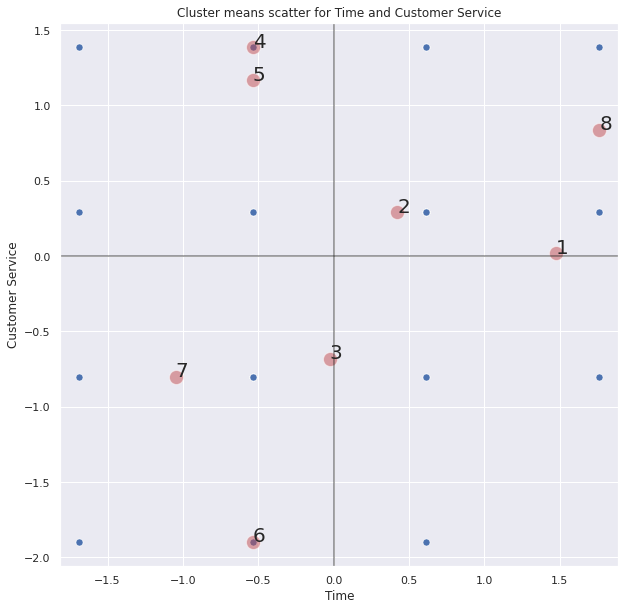

,Charge,Time,Variety,Discount,Customer Service,Features
0,-0.294514,0.613983,0.487704,-2.001160,-0.801870,1.253566
1,-1.499343,-1.688452,-0.667385,-0.989338,0.291589,-1.253566
2,0.910315,-0.537235,-0.667385,1.034308,0.291589,0.000000
3,-1.499343,-0.537235,0.487704,-0.989338,1.385048,0.000000
4,-1.499343,-1.688452,0.487704,0.022485,-0.801870,-1.253566


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

def compute_corr_X_Z(df_X, df_Z):
    K_X = df_X.shape[1]
    corr_X_Z = pd.concat([df_X, df_Z], axis=1).corr().iloc[:K_X, K_X:]
    return pd.DataFrame(
        corr_X_Z.values,
        index=df_X.columns,
        columns=df_Z.columns,
    )
X=pd.read_csv("/content/Survey - Team 1_Cluster.csv", usecols=['Charge', 'Time', 'Variety', 'Discount', 
                                                               'Customer Service', 'Features'])
Labels = {'Charge':[1], 'Time':[2], 'Variety':[3], 'Discount':[4], 'Customer Service':[5], 'Features':[6]}

X = X - X.mean()
X = X / X.std()

from sklearn.cluster import KMeans
kmeans = KMeans(random_state=744)
kmeans.fit(X)

M = kmeans.cluster_centers_
M = pd.DataFrame(M, index=np.arange(kmeans.n_clusters) + 1, columns = Labels)
M.round(2)

plt.figure(figsize=(10, 10))

# variable names
x_var = 'Time'
y_var = 'Customer Service'
plt.title('Cluster means scatter for ' + x_var + ' and ' + y_var)

# create line for the axes
plt.axhline(0, alpha=0.5, color='k')
plt.axvline(0, alpha=0.5, color='k')

# scatterplot for the observations
sns.scatterplot(
    x=x_var,
    y=y_var,
    data=X,
    s=50,
)

# scatterplot for the cluster means
sns.scatterplot(
    x=x_var,
    y=y_var,
    data=M,
    s=200,
    color='r',
    alpha=0.5,
)

# add a label for each cluster mean
for k in range(kmeans.n_clusters):
    plt.annotate(
        s=k + 1,
        xy=M.loc[k + 1, [x_var, y_var]],
        fontsize=20
    )  

plt.axis('equal')
plt.show()

X.head()

**Hierarchical Clustering**

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

S = pd.read_csv("/content/Survey - Team 1_Cluster.csv", usecols=['Service','Charge', 'Time', 'Variety', 
                                                                 'Discount', 'Customer Service', 'Features'])

S = S.set_index('Service')
X = S.copy()
X = (X - X.mean()) / X.std()
X.head()

N, P = X.shape

from scipy.cluster.hierarchy import linkage, dendrogram
numpy_Z = linkage(X)

Z = pd.DataFrame(
    numpy_Z,
    columns=['cluster_A', 'cluster_B', 'distance', 'size_new_cluster']
)

Z['cluster_A'] = Z['cluster_A'].astype(int)
Z['cluster_B'] = Z['cluster_B'].astype(int)
Z['size_new_cluster'] = Z['size_new_cluster'].astype(int)

assert Z.shape[0] == (N - 1)

Z['cluster_number'] = N + np.arange(N - 1)

Z.head()


,cluster_A,cluster_B,distance,size_new_cluster,cluster_number
0,5,16,0.000000,2,45
1,30,40,0.000000,2,46
2,8,29,0.000000,2,47
3,18,45,1.011823,3,48
4,11,41,1.093459,2,49


**Dendrogram**

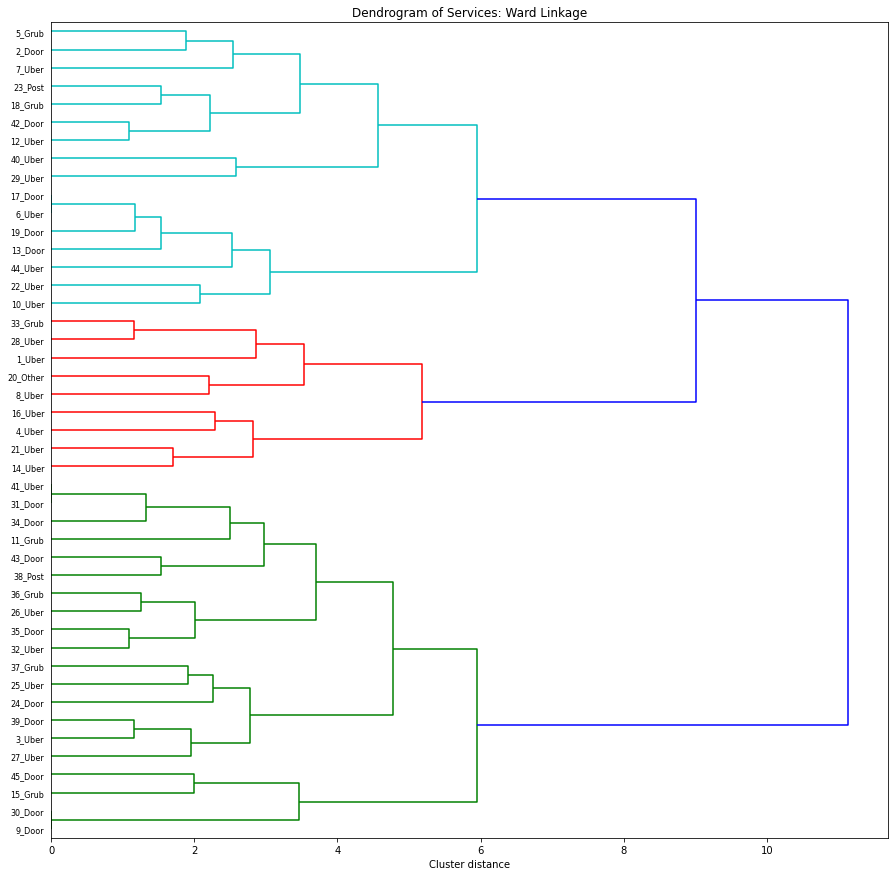

In [2]:
# initialize a new figure
fig = plt.figure(figsize=(15, 15))

# create the dendrogram
dn = dendrogram(
    linkage(X, method='ward'), # change this from 'single' to 'ward'
    orientation='right',
    labels=X.index,
)

# Add title and x-axis label
plt.title('Dendrogram of Services: Ward Linkage') # don't forget to change your title!
plt.xlabel('Cluster distance')

# show the figure
plt.show()

Cluster 1

In [3]:
C1 = S.loc[['5_Grub', '2_Door', '7_Uber', '23_Post', '18_Grub', '42_Door', '12_Uber', '40_Uber', '29_Uber', '17_Door',
       '6_Uber', '19_Door', '13_Door', '44_Uber', '22_Uber', '10_Uber']]
C1

,Charge,Time,Variety,Discount,Customer Service,Features
Service,,,,,,
5_Grub,2,2,4,3,3,3
2_Door,2,2,3,2,4,3
7_Uber,2,2,4,2,2,4
23_Post,3,3,4,2,3,3
18_Grub,3,3,5,3,3,3
42_Door,3,3,4,3,4,4
12_Uber,3,3,4,3,3,4
40_Uber,3,2,4,2,2,2
29_Uber,3,3,2,2,2,2


In [4]:
print(C1['Charge'].value_counts())
print(C1['Time'].value_counts())
print(C1['Variety'].value_counts())
print(C1['Discount'].value_counts())
print(C1['Customer Service'].value_counts())
print(C1['Features'].value_counts())

3    11
2     5
Name: Charge, dtype: int64
3    10
2     4
4     2
Name: Time, dtype: int64
4    6
3    5
2    4
5    1
Name: Variety, dtype: int64
2    11
3     5
Name: Discount, dtype: int64
3    8
4    4
2    4
Name: Customer Service, dtype: int64
4    9
3    4
2    2
5    1
Name: Features, dtype: int64


In [5]:
print(C1['Charge'].mean())
print(C1['Time'].mean())
print(C1['Variety'].mean())
print(C1['Discount'].mean())
print(C1['Customer Service'].mean())
print(C1['Features'].mean())

2.6875
2.875
3.25
2.3125
3.0
3.5625


Cluster 2

In [6]:
C2 = S.loc[['33_Grub', '28_Uber', '1_Uber', '20_Other', '8_Uber', '16_Uber', '4_Uber', '21_Uber', '14_Uber']]
C2

,Charge,Time,Variety,Discount,Customer Service,Features
Service,,,,,,
33_Grub,3,4,5,2,5,5
28_Uber,3,4,4,2,5,5
1_Uber,3,4,4,1,3,5
20_Other,4,3,5,3,4,5
8_Uber,4,2,4,2,5,5
16_Uber,2,2,5,3,5,5
4_Uber,2,3,4,2,5,4
21_Uber,2,3,3,4,5,4
14_Uber,2,3,4,4,5,5


In [7]:
print(C2['Charge'].value_counts())
print(C2['Time'].value_counts())
print(C2['Variety'].value_counts())
print(C2['Discount'].value_counts())
print(C2['Customer Service'].value_counts())
print(C2['Features'].value_counts())

2    4
3    3
4    2
Name: Charge, dtype: int64
3    4
4    3
2    2
Name: Time, dtype: int64
4    5
5    3
3    1
Name: Variety, dtype: int64
2    4
3    2
4    2
1    1
Name: Discount, dtype: int64
5    7
3    1
4    1
Name: Customer Service, dtype: int64
5    7
4    2
Name: Features, dtype: int64


In [8]:
print(C2['Charge'].mean())
print(C2['Time'].mean())
print(C2['Variety'].mean())
print(C2['Discount'].mean())
print(C2['Customer Service'].mean())
print(C2['Features'].mean())

2.7777777777777777
3.111111111111111
4.222222222222222
2.5555555555555554
4.666666666666667
4.777777777777778


Cluster 3

In [9]:
C3 = S.loc[['41_Uber', '31_Door', '34_Door', '11_Grub', '43_Door', '38_Post', '36_Grub','26_Uber','35_Door','32_Uber',
       '37_Grub','25_Uber','24_Door','39_Door','3_Uber','27_Uber','45_Door','15_Grub','30_Door','9_Door']]
C3

,Charge,Time,Variety,Discount,Customer Service,Features
Service,,,,,,
41_Uber,4,4,4,4,4,4
31_Door,4,4,4,4,4,4
34_Door,4,5,4,4,4,4
11_Grub,4,5,5,3,3,4
43_Door,4,5,4,3,4,3
38_Post,4,4,4,2,4,3
36_Grub,3,4,4,4,4,3
26_Uber,3,4,4,4,4,4
35_Door,3,4,3,4,4,4


In [10]:
print(C3['Charge'].value_counts())
print(C3['Time'].value_counts())
print(C3['Variety'].value_counts())
print(C3['Discount'].value_counts())
print(C3['Customer Service'].value_counts())
print(C3['Features'].value_counts())

4    14
3     4
5     2
Name: Charge, dtype: int64
4    12
5     5
3     3
Name: Time, dtype: int64
3    9
4    8
5    2
2    1
Name: Variety, dtype: int64
4    12
3     4
2     2
5     2
Name: Discount, dtype: int64
4    12
3     5
5     3
Name: Customer Service, dtype: int64
4    12
3     4
5     4
Name: Features, dtype: int64


In [11]:
print(C3['Charge'].mean())
print(C3['Time'].mean())
print(C3['Variety'].mean())
print(C3['Discount'].mean())
print(C3['Customer Service'].mean())
print(C3['Features'].mean())

3.9
4.1
3.55
3.7
3.9
4.0


Do not need following dendrograms

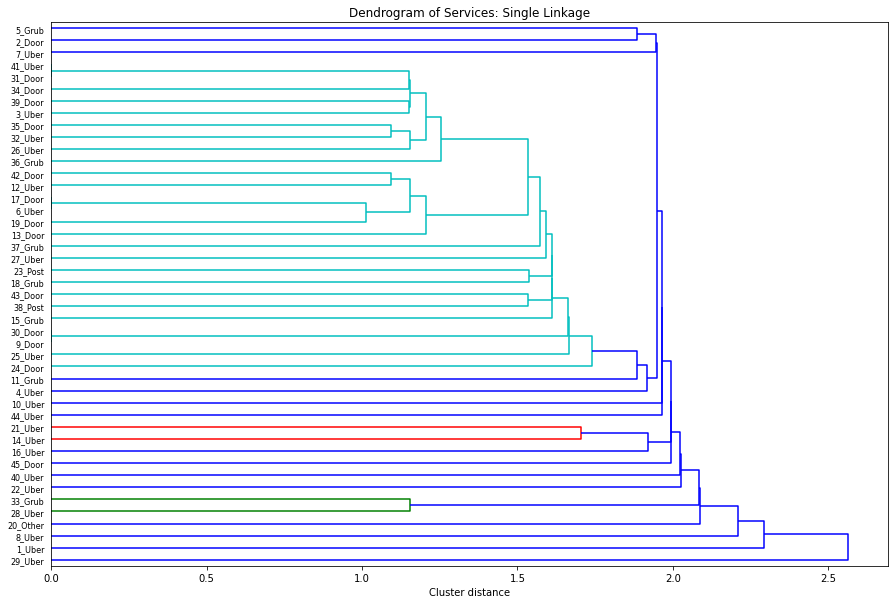

In [12]:
# initialize a new figure
fig = plt.figure(figsize=(15, 10))

# create the dendrogram
dn = dendrogram(
    linkage(X, method='single'), # change this from 'single' to 'ward'
    orientation='right',
    labels=X.index,
)

# Add title and x-axis label
plt.title('Dendrogram of Services: Single Linkage') # don't forget to change your title!
plt.xlabel('Cluster distance')

# show the figure
plt.show()

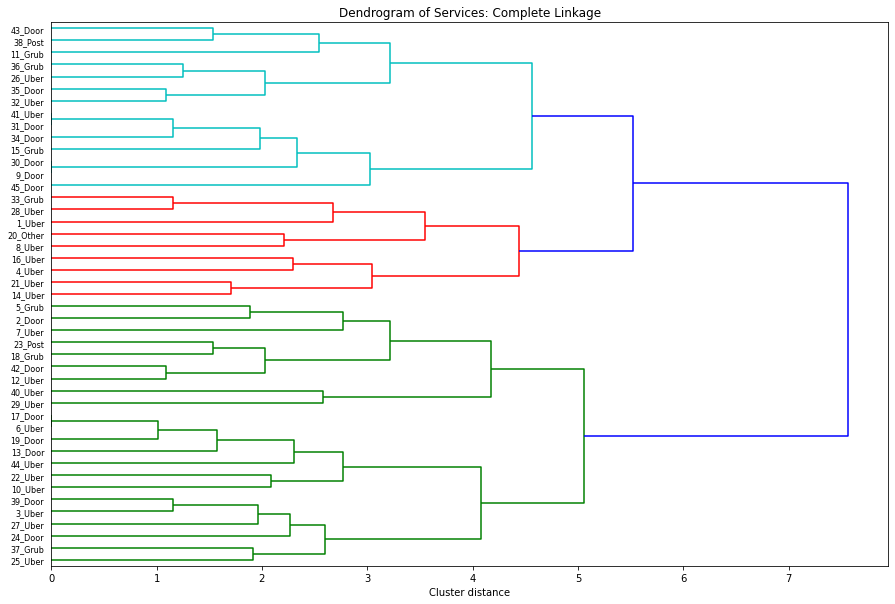

In [13]:
# initialize a new figure
fig = plt.figure(figsize=(15, 10))

# create the dendrogram
dn = dendrogram(
    linkage(X, method='complete'), # change this from 'single' to 'ward'
    orientation='right',
    labels=X.index,
)

# Add title and x-axis label
plt.title('Dendrogram of Services: Complete Linkage') # don't forget to change your title!
plt.xlabel('Cluster distance')

# show the figure
plt.show()

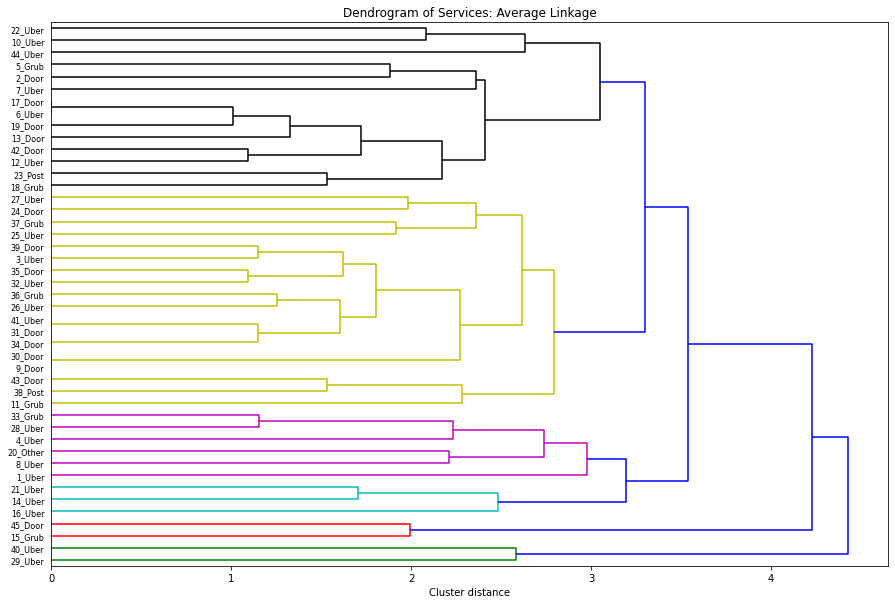

In [14]:
# initialize a new figure
fig = plt.figure(figsize=(15, 10))

# create the dendrogram
dn = dendrogram(
    linkage(X, method='average'), # change this from 'single' to 'ward'
    orientation='right',
    labels=X.index,
)

# Add title and x-axis label
plt.title('Dendrogram of Services: Average Linkage') # don't forget to change your title!
plt.xlabel('Cluster distance')

# show the figure
plt.show()